In [14]:
import sys

import pandas as pd

sys.path.append('../')
from lib.functions import *
import sklearn.metrics as sm

In [101]:
directory="../cooja3-16nodes/"
df = pd.read_csv(directory+"stats_corrected2.csv")

corr=df["type_corrected"].values
correction=[]



features_to_drop=[
        "label",
         #"mean",
        # "var",
        # "std",
        # "packet loss",
        # "outliers",
        # "hop",
        #"count",
        "node",
    "type",
    "type_corrected",
    "type_corrected_2"
        
       
    ]
for i in range(len(corr)):
    if(i=="normal"):
        correction.append(0)
    else: 
        correction.append(1)
data = df.drop(features_to_drop, axis=1)

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)

labels = accuracy_score_corrected(correction, labels)

accuracy=sm.accuracy_score(correction,labels)
confusion_matrix=sm.confusion_matrix(correction, labels)
print(accuracy)
print(confusion_matrix)

0.9134615384615384
[[  0   0]
 [ 18 190]]


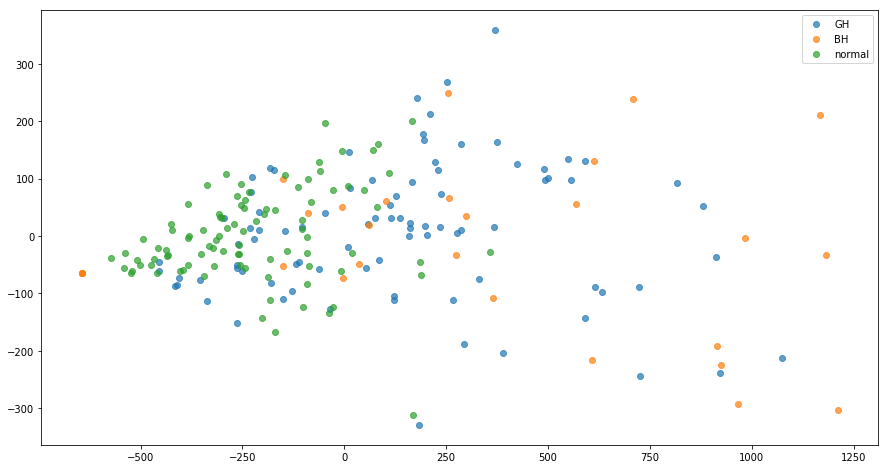

In [103]:
X = data.iloc[:,0:4]
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = df['type_corrected_2']
dfPCA.head()

labels = df['type_corrected_2'].unique().tolist()
plt.figure(figsize=(15,8))
for lab in labels:
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab, alpha=0.7)
    plt.legend()


In [ ]:
Y=data
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [68]:

from sklearn.neighbors import NearestNeighbors

In [71]:
def k_nearest_neighbor_classification(trace_stats, features_to_drop, n_estimators=100, test_size=0.3, n_neighbors=3):
	# INPUT: 
	######## trace_stats a dictionary containing (window_size, statistics per node) pairs 
	######## features_to_drop a list of features to drop
	######## n_estimators number of estimators
	######## test_size the size of test set
	######## n_neighbors number of neighbors

	# OUTPUT: return a dataframe containing accuracy, precision, recall and f1-score for each window size

	results = None
	
	for trace_size in trace_stats:
	    print('Computing trace {}'.format(trace_size))
	    trace = trace_stats[trace_size]
	    
	    
	    #Create KNN Classifier
	    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

	    t0 = time.time()  # Start a timer

	    #Train the model using the training sets
	    knn.fit(X_train, y_train)

	    #Predict the response for test dataset
	    y_pred = knn.predict(X_test)
	    
	    # Add results to a Dataframe
	    if results is None:
	        results = pd.DataFrame({'Model': ['KNN'], 
	                                'Window Size': [trace_size], 
	                                'Accuracy': [metrics.accuracy_score(y_test, y_pred)],
	                                'Precision': [metrics.precision_score(y_test, y_pred, average='macro')], 
	                                'Recall': [metrics.recall_score(y_test, y_pred, average='macro')], 
	                                'F1-score': [metrics.f1_score(y_test, y_pred, average='macro')],
	                                'Time (ms)': [time.time() - t0]})
	    else:
	        results = pd.concat([results,pd.DataFrame({'Model': ['KNN'], 
	                                                         'Window Size': [trace_size], 
	                                                         'Accuracy': [metrics.accuracy_score(y_test, y_pred)],
	                                                         'Precision': [metrics.precision_score(y_test, y_pred, average='macro')], 
	                                                         'Recall': [metrics.recall_score(y_test, y_pred, average='macro')], 
	                                                         'F1-score': [metrics.f1_score(y_test, y_pred, average='macro')],
	                                                         'Time (ms)': [time.time() - t0]})])


	return results

In [98]:

results=pd.DataFrame()
#####KNN
n_estimators=100 
test_size=0.3
n_neighbors=3
# separate features from target values
features = df.drop(columns=features_to_drop)
target = df['type_corrected'].values
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=1)
knn = KNeighborsClassifier(n_neighbors=n_neighbors) 
#t0 = time.time()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

results = pd.concat([results,pd.DataFrame({'Model': ['KNN'], 
                                               'Window Size': ["100"],
                                               'Accuracy': [metrics.accuracy_score(y_test, y_pred)],
                                               'Precision': [metrics.precision_score(y_test, y_pred, average='macro')],
                                               'Recall': [metrics.recall_score(y_test, y_pred, average='macro')], 
                                               'F1-score': [metrics.f1_score(y_test, y_pred, average='macro')],
                                               #'Time (ms)': [time.time() - t0]
                                              })])
results

,Model,Window Size,Accuracy,Precision,Recall,F1-score
0,KNN,100,0.84127,0.434426,0.481818,0.456897


,label,type,type_corrected,packet loss,node,count,std,mean,var,hop,outliers
0,grid_normal_2019-02-26_11:48_,normal,normal,46,aaaa::212:740e:e:e0e,54,626.231311,966.925926,3.921657e+05,5,3
1,grid_normal_2019-02-26_11:48_,normal,normal,51,aaaa::212:7408:8:808,49,407.966792,672.816326,1.664369e+05,2,2
2,grid_normal_2019-02-26_11:48_,normal,normal,51,aaaa::212:740d:d:d0d,49,626.914296,974.612245,3.930215e+05,4,2
3,grid_normal_2019-02-26_11:48_,normal,normal,53,aaaa::212:7403:3:303,47,245.210486,295.919149,6.012818e+04,1,2
4,grid_normal_2019-02-26_11:48_,normal,abnormal,68,aaaa::212:740a:a:a0a,32,706.283822,997.531250,4.988368e+05,4,1
5,grid_normal_2019-02-26_11:48_,normal,normal,43,aaaa::212:740f:f:f0f,57,841.723066,1208.315789,7.084977e+05,4,5
6,grid_normal_2019-02-26_11:48_,normal,abnormal,76,aaaa::212:7410:10:1010,24,354.458303,886.083333,1.256407e+05,4,2
7,grid_normal_2019-02-26_11:48_,normal,normal,53,aaaa::212:740c:c:c0c,47,610.619921,978.085106,3.728567e+05,3,2
8,grid_normal_2019-02-26_11:48_,normal,normal,55,aaaa::212:7404:4:404,45,256.470234,300.460000,6.577698e+04,1,3
9,grid_normal_2019-02-26_11:48_,normal,normal,46,aaaa::212:7406:6:606,54,559.739998,932.759259,3.133089e+05,3,3


In [73]:
df.head()

,label,type,type_corrected,packet loss,node,count,std,mean,var,hop,outliers
0,grid_normal_2019-02-26_11:48_,normal,normal,46,aaaa::212:740e:e:e0e,54,626.231311,966.925926,392165.65480,5,3
1,grid_normal_2019-02-26_11:48_,normal,normal,51,aaaa::212:7408:8:808,49,407.966792,672.816326,166436.90310,2,2
2,grid_normal_2019-02-26_11:48_,normal,normal,51,aaaa::212:740d:d:d0d,49,626.914296,974.612245,393021.53400,4,2
3,grid_normal_2019-02-26_11:48_,normal,normal,53,aaaa::212:7403:3:303,47,245.210486,295.919149,60128.18245,1,2
4,grid_normal_2019-02-26_11:48_,normal,abnormal,68,aaaa::212:740a:a:a0a,32,706.283822,997.531250,498836.83770,4,1
